# 1.Importing Libs and Loading Data Into DataFrame

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#### disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv data
loanDf = pd.read_csv("datas/loan.csv")

In [3]:
##### peaking the head data to get a birds eye read
loanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#### lets get the shape of the Data Frame
loanDf.shape

(39717, 111)

# 2.Data Cleaning

#### Lets find how many null values are present in each of the columns in the dataframe


In [5]:
loanDf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### 39717 is the total number of rows in loan data frame so no point in having a column with all null values 
#### Lets remove all the columns where all the rows are null

In [6]:
loanDf.dropna(axis=1,how='all',inplace=True)
loanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### 54 columns of null data have been removed

#### Lets check for duplicated values

In [7]:
duplicated = {}
for column in loanDf:
    gb = loanDf.groupby(column).size()
    duplicated[column] = gb[gb>1].sum()

duplicated

{'id': 0,
 'member_id': 0,
 'loan_amnt': 39522,
 'funded_amnt': 39541,
 'funded_amnt_inv': 32595,
 'term': 39717,
 'int_rate': 39700,
 'installment': 30647,
 'grade': 39717,
 'sub_grade': 39717,
 'emp_title': 11617,
 'emp_length': 38642,
 'home_ownership': 39717,
 'annual_inc': 35754,
 'verification_status': 39717,
 'issue_d': 39716,
 'loan_status': 39717,
 'pymnt_plan': 39717,
 'url': 0,
 'desc': 278,
 'purpose': 39717,
 'title': 22082,
 'zip_code': 39662,
 'addr_state': 39717,
 'dti': 39536,
 'delinq_2yrs': 39715,
 'earliest_cr_line': 39684,
 'inq_last_6mths': 39717,
 'mths_since_last_delinq': 14026,
 'mths_since_last_record': 2776,
 'open_acc': 39712,
 'pub_rec': 39717,
 'revol_bal': 27629,
 'revol_util': 39578,
 'total_acc': 39704,
 'initial_list_status': 39717,
 'out_prncp': 38585,
 'out_prncp_inv': 38583,
 'total_pymnt': 2774,
 'total_pymnt_inv': 3330,
 'total_rec_prncp': 32653,
 'total_rec_int': 7306,
 'total_rec_late_fee': 38410,
 'recoveries': 35837,
 'collection_recovery_fee'

In [8]:
loanDf.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [9]:
loanDf.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [10]:
loanDf.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [11]:
loanDf.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [12]:
loanDf.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [13]:
loanDf.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
loanDf.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

#### pymnt_plan column has dupplicated value lets add this column to colum drop list

In [15]:
columnDropList = []
columnDropList.append('pymnt_plan')
print(columnDropList)

['pymnt_plan']


In [16]:
loanDf.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [17]:
loanDf.addr_state.value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [18]:
loanDf.inq_last_6mths.value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

In [19]:
loanDf.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [20]:
loanDf.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [21]:
loanDf.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

#### fullly duplicated colum initial_list_status so adding to drop list

In [22]:
columnDropList.append('initial_list_status')
print(columnDropList)

['pymnt_plan', 'initial_list_status']


In [23]:
loanDf.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

#### fullly duplicated colum application_type so adding to drop list

In [24]:
columnDropList.append('application_type')
print(columnDropList)

['pymnt_plan', 'initial_list_status', 'application_type']


In [25]:
loanDf.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

#### fullly duplicated colum acc_now_delinq so adding to drop list

In [26]:
columnDropList.append('acc_now_delinq')
print(columnDropList)

['pymnt_plan', 'initial_list_status', 'application_type', 'acc_now_delinq']


In [27]:
loanDf.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

#### fullly duplicated colum collections_12_mths_ex_med so adding to drop list

In [28]:
columnDropList.append('collections_12_mths_ex_med')
print(columnDropList)

['pymnt_plan', 'initial_list_status', 'application_type', 'acc_now_delinq', 'collections_12_mths_ex_med']


In [29]:
loanDf.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

#### fullly duplicated colum policy_code so adding to drop list

In [30]:
columnDropList.append('policy_code')
print(columnDropList)

['pymnt_plan', 'initial_list_status', 'application_type', 'acc_now_delinq', 'collections_12_mths_ex_med', 'policy_code']


In [31]:
loanDf.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

#### fullly duplicated colum delinq_amnt so adding to drop list

In [32]:
columnDropList.append('delinq_amnt')
print(columnDropList)

['pymnt_plan', 'initial_list_status', 'application_type', 'acc_now_delinq', 'collections_12_mths_ex_med', 'policy_code', 'delinq_amnt']


In [33]:
loanDf.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

#### fullly duplicated colum tax_liens so adding to drop list

In [34]:
columnDropList.append('tax_liens')
print(columnDropList)

['pymnt_plan', 'initial_list_status', 'application_type', 'acc_now_delinq', 'collections_12_mths_ex_med', 'policy_code', 'delinq_amnt', 'tax_liens']


#### Now by using duplicated function we deep dived into columns with high number of duplications and added the ones that had fully duplicated values to the column drop list. now lets drop the completely duplicated colums

In [35]:
loanDf.drop(columnDropList,axis=1,inplace=True)
loanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0,0.0


#### Lets read the data Dictionary to find out which data is irrelevant to our needs

In [36]:
dataDict = pd.read_excel('datas/Data_Dictionary.xlsx')
print(dataDict.to_markdown())

|     | LoanStatNew                    | Description                                                                                                                                                                                                        |
|----:|:-------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   0 | acc_now_delinq                 | The number of accounts on which the borrower is now delinquent.                                                                                                                                                    |
|   1 | acc_open_past_24mths           | Number of trades opened in past 24 months.                                                                                                                                                           

#### addr_state,emp_title,id,member_id,title,url,zip_code are the columns that we can never use to predict default as they have irrelevant data for this purpose , so lets drop them 

In [37]:
loanDf.drop(['addr_state','emp_title','id','member_id','title','url','zip_code'],axis=1,inplace=True)
loanDf.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,...,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,...,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,...,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0,0.0


In [38]:
loanDf.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

#### desc column is fullly text so dropping it 

In [39]:
loanDf.drop(['desc'],axis=1,inplace=True)
loanDf.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


#### Removing out_prncp_inv and total_pymnt_inv as they are only usefull to investors not for analyzing possible future default

#### Removing funded_amnt as this is not the actual funded amount

In [40]:
loanDf.drop(['funded_amnt','out_prncp_inv','total_pymnt_inv'],axis=1,inplace=True)
loanDf.head(5)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


#### Now Lets remove all the columns whose data can only be used for post loan disbursement calculations

In [41]:
loanDf.drop(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int','next_pymnt_d' , 'chargeoff_within_12_mths', 'mths_since_last_delinq', 'mths_since_last_record'],axis=1,inplace=True)
loanDf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.70%,9,May-16,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.40%,4,Sep-13,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.50%,10,May-16,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21%,37,Apr-16,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,other,17.94,Jan-96,0,15,0,53.90%,38,May-16,0.0


In [42]:
loanDf.shape

(39717, 23)

In [43]:
loanDf.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Droping last_credit_pull_d as this wont be usefull for default prediction

In [44]:
loanDf.drop(['last_credit_pull_d'],axis=1,inplace=True)
loanDf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,17.94,Jan-96,0,15,0,53.90%,38,0.0


#### Looks like we can make use of all the remaining 22 columns of data

#### Part Data Removal

In [45]:
loanDf.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### 1140 people currently going through emis , we have no use for this data to predict default

In [46]:
loanDf = loanDf[loanDf.loan_status != 'Current']
loanDf.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [47]:
loanDf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


#### There may be column with part null values lets check them

In [48]:
loanDf.isna().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

#### We have 3 columns emp_length,revol_util,pub_rec_bankruptcies who have null or missing values lets handle them

In [49]:
loanDf.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

#### Since 0.0 is the most used value by large margin we can fill missing with this value

In [50]:
loanDf.pub_rec_bankruptcies.fillna(0.0,inplace=True)
loanDf.pub_rec_bankruptcies.isna().sum()

0

In [51]:
loanDf.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

#### Lets drop the row since the number of missing is only 50

In [52]:
loanDf.dropna(axis=0,subset=['revol_util'],inplace=True)
loanDf.revol_util.isna().sum()

0

#### Lets check emp_length.value_counts()

In [53]:
loanDf.emp_length.value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

#### 10+ years is nearly double the value of the next frequent value so we can fill in missing with the most common value on this column

In [54]:
loanDf.emp_length.info()

<class 'pandas.core.series.Series'>
Int64Index: 38527 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
37497 non-null  object
dtypes: object(1)
memory usage: 602.0+ KB


In [55]:
loanDf.emp_length.fillna(loanDf.emp_length.mode()[0], inplace = True)
loanDf.emp_length.isna().sum()

0

In [56]:
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt_inv       38527 non-null  float64
 2   term                  38527 non-null  object 
 3   int_rate              38527 non-null  object 
 4   installment           38527 non-null  float64
 5   grade                 38527 non-null  object 
 6   sub_grade             38527 non-null  object 
 7   emp_length            38527 non-null  object 
 8   home_ownership        38527 non-null  object 
 9   annual_inc            38527 non-null  float64
 10  verification_status   38527 non-null  object 
 11  issue_d               38527 non-null  object 
 12  loan_status           38527 non-null  object 
 13  purpose               38527 non-null  object 
 14  dti                   38527 non-null  float64
 15  earliest_cr_line   

In [57]:
loanDf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


#### Now lets standardize the data to a format where it is easy to work with and perform calculation and derive metrics from it.

In [58]:
loanDf.term.value_counts()

 36 months    29049
 60 months     9478
Name: term, dtype: int64

#### Lets standardice term to number of months

In [59]:
loanDf.term = loanDf.term.apply(lambda x : x.replace(' months','')).astype('int32')
loanDf.term.value_counts()

36    29049
60     9478
Name: term, dtype: int64

#### Lets remove % from int_rate

In [60]:
loanDf.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [61]:
loanDf.int_rate = loanDf.int_rate.apply(lambda x : str(x).replace('%','')).astype('float')

In [62]:
loanDf.int_rate.value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

#### Lets remove % from revol_util

In [63]:
loanDf.revol_util = loanDf.revol_util.apply(lambda x : x.split('%')[0]).astype('float')
loanDf.revol_util.value_counts()

0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

#### Lets convert emp_length range values into absolute numeric values

In [64]:
loanDf.emp_length = loanDf.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])).astype('int32')

In [65]:
loanDf.emp_length.value_counts()

10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: emp_length, dtype: int64

In [66]:
loanDf.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0.0
6,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,...,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.6,11,0.0
7,3000,3000.0,36,18.64,109.43,E,E1,9,RENT,48000.0,...,Fully Paid,car,5.35,Jan-07,2,4,0,87.5,4,0.0
8,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,...,Charged Off,small_business,5.55,Apr-04,2,11,0,32.6,13,0.0
9,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,15000.0,...,Charged Off,other,18.08,Sep-04,0,2,0,36.5,3,0.0
10,6500,6500.0,60,14.65,153.45,C,C3,5,OWN,72000.0,...,Fully Paid,debt_consolidation,16.12,Jan-98,2,14,0,20.6,23,0.0


### Outliers Detection and Fixing

#### loan_amnt,funded_amnt_inv and annual_inc are the three columns that may have outliers data from analysing the range diff between data.

<AxesSubplot:xlabel='loan_amnt'>

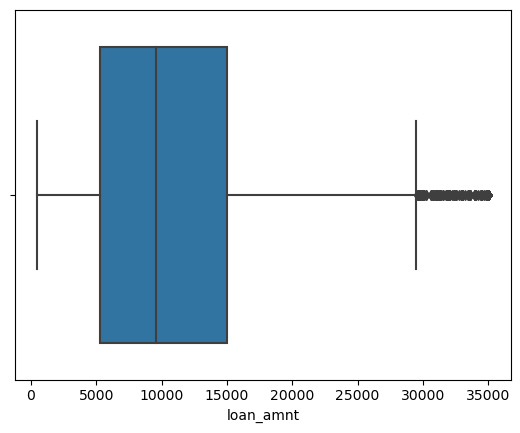

In [67]:
sns.boxplot(loanDf.loan_amnt)

### loan_amnt Looks Good

<AxesSubplot:xlabel='funded_amnt_inv'>

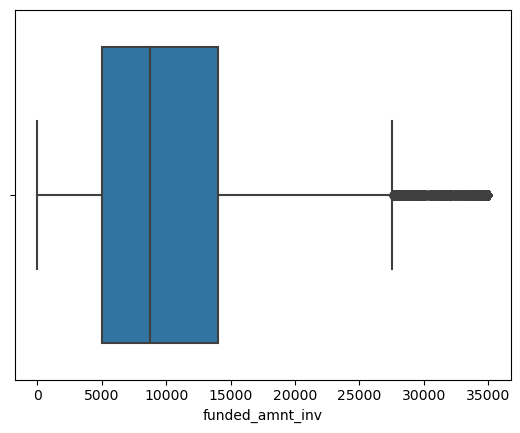

In [68]:
sns.boxplot(loanDf.funded_amnt_inv)

#### funded_amnt_inv Lo0ks Good 

<AxesSubplot:xlabel='annual_inc'>

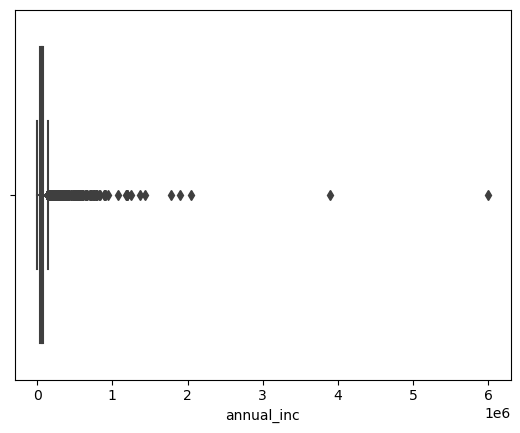

In [69]:
sns.boxplot(loanDf['annual_inc'])


#### Looks like so much outliers are there in annual_inc , Look at how compressed the graph looks and how way off the max values are far away from median
 

In [70]:
loanDf.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.25     40000.0
0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

#### Everything above the 95th quantile looks like outliers lets see removing them

In [71]:
quant95 = loanDf['annual_inc'].quantile(0.95)
loanDf = loanDf[loanDf.annual_inc <= quant95]

<AxesSubplot:xlabel='annual_inc'>

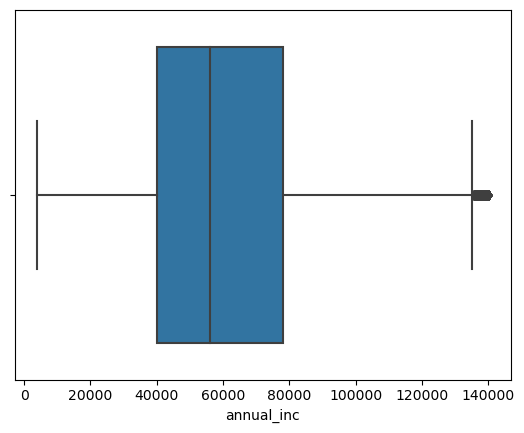

In [72]:
sns.boxplot(loanDf.annual_inc)

#### Yes now looks much better with clearly defined 25,50,75 and only few values with high range from the medien

<AxesSubplot:xlabel='dti'>

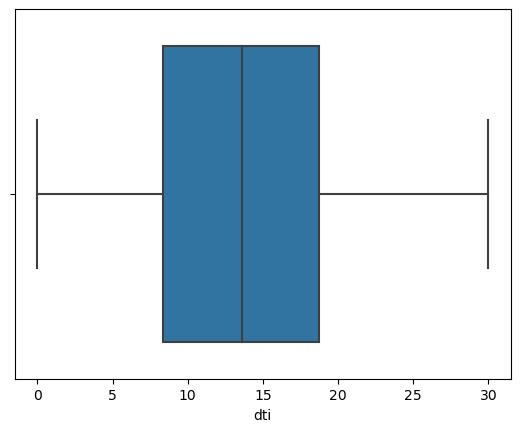

In [73]:
sns.boxplot(loanDf.dti)

#### Ok Looks like the columns with high range of data now looks good after outliers cleanup.

# 3. Data Analysis
### 3.1 Univariate Analysis

#### Lets see whats the distribution of loans status

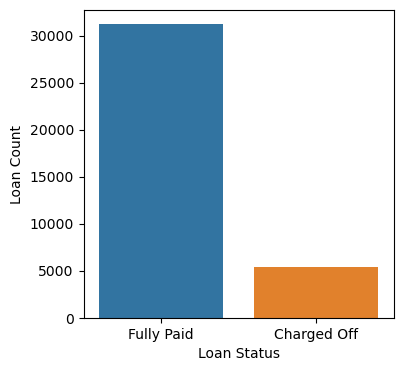

In [74]:
plt.figure(figsize=(4,4))
ls = sns.countplot(x='loan_status',data = loanDf)
ls.set(xlabel='Loan Status',ylabel='Loan Count')
plt.show()

#### We are only going to be looking at charged off as we are more concerned about detecting possible default so lets separate the data frames for ease of analysis

In [75]:
loanChargedOffDf = loanDf.loc[loanDf['loan_status']=='Charged Off']
loanFullyPaidDf = loanDf.loc[loanDf['loan_status']=='Fully Paid']

In [76]:
loanChargedOffDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 1 to 39678
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             5402 non-null   int64  
 1   funded_amnt_inv       5402 non-null   float64
 2   term                  5402 non-null   int32  
 3   int_rate              5402 non-null   float64
 4   installment           5402 non-null   float64
 5   grade                 5402 non-null   object 
 6   sub_grade             5402 non-null   object 
 7   emp_length            5402 non-null   int32  
 8   home_ownership        5402 non-null   object 
 9   annual_inc            5402 non-null   float64
 10  verification_status   5402 non-null   object 
 11  issue_d               5402 non-null   object 
 12  loan_status           5402 non-null   object 
 13  purpose               5402 non-null   object 
 14  dti                   5402 non-null   float64
 15  earliest_cr_line    

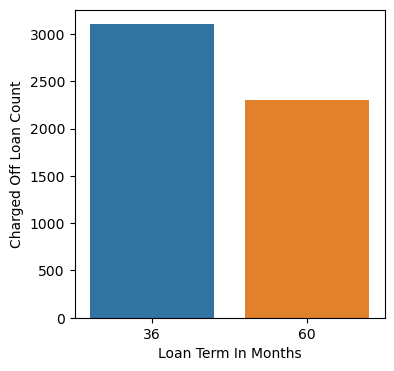

In [77]:
plt.figure(figsize=(4,4))
tc = sns.countplot(x='term',data = loanChargedOffDf)
tc.set(xlabel='Loan Term In Months',ylabel='Charged Off Loan Count')
plt.show()

#### Observation 1 - The Lesser The Term The Greater than chance for default

In [78]:
interestRateBins = pd.IntervalIndex.from_tuples([(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)])
loanChargedOffDf['interestRateBins'] = pd.cut(loanChargedOffDf['int_rate'], interestRateBins,precision =0,labels=['0%-5%','5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])

In [79]:
loanChargedOffDf.interestRateBins.value_counts()

(10, 15]    2627
(15, 20]    1697
(5, 10]      812
(20, 25]     266
(0, 5]         0
(25, 30]       0
Name: interestRateBins, dtype: int64

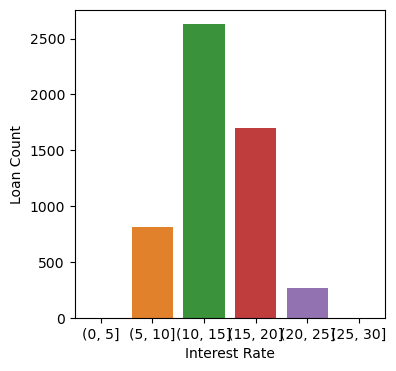

In [80]:
plt.figure(figsize=(4,4))
tc = sns.countplot(x='interestRateBins',data = loanChargedOffDf)
tc.set(xlabel='Interest Rate',ylabel='Loan Count')
plt.show()

#### Observation 2 - Interest rate of 10% and above is when the default rates increase

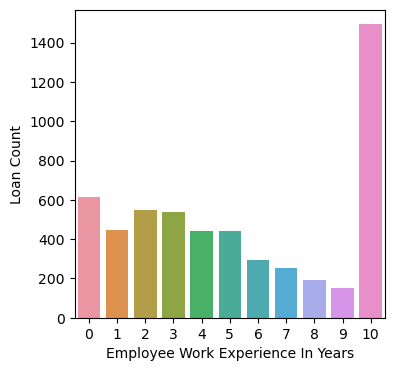

In [81]:
plt.figure(figsize=(4,4))
tc = sns.countplot(x='emp_length',data = loanChargedOffDf)
tc.set(xlabel='Employee Work Experience In Years',ylabel='Loan Count')
plt.show()

#### Observation 3 - Employees whos experience is 10 years are the one's with greater chance of default.

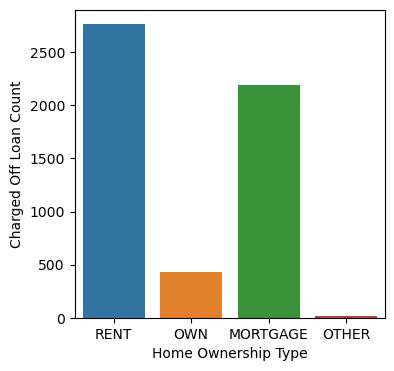

In [82]:
plt.figure(figsize=(4,4))
ho = sns.countplot(loanChargedOffDf['home_ownership'])
ho.set(xlabel='Home Ownership Type', ylabel='Charged Off Loan Count')
plt.show()

#### Observation 4 - People who are staying in a rental home has the highest chance to default

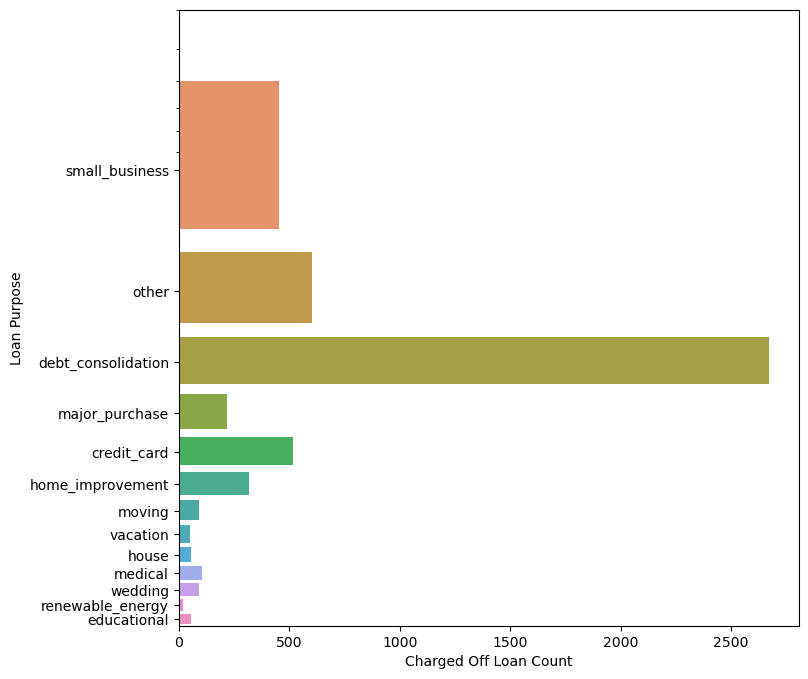

In [83]:
unNeeded,lt = plt.subplots(figsize = (8,8))
lt.set(yscale = 'log')
ltPlot = sns.countplot(y ='purpose', data=loanChargedOffDf)
ltPlot.set(xlabel='Charged Off Loan Count', ylabel='Loan Purpose')
plt.show()

#### Observation 5 - People who are trying to rechange or restructure the already existing loan are the number one defaulters

In [84]:
loanChargedOffDf['annual_inc'].describe()

count      5402.000000
mean      56512.293615
std       26574.695198
min        4080.000000
25%       36400.000000
50%       51996.000000
75%       71810.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [85]:
annualIncomeBins = pd.IntervalIndex.from_tuples([(0, 25000), (25000, 50000), (50000, 75000), (75000, 100000), (100000, 125000), (125000, 150000)])
loanChargedOffDf['annualIncomeBins'] = pd.cut(loanChargedOffDf['annual_inc'], annualIncomeBins,precision =0,labels=['0k-25k','25k-50k','50k-75k','75k-1L','1L-1.25L','1.25L-1.5L'])

In [86]:
loanChargedOffDf.annualIncomeBins.value_counts()

(25000, 50000]      2117
(50000, 75000]      1685
(75000, 100000]      736
(0, 25000]           481
(100000, 125000]     293
(125000, 150000]      90
Name: annualIncomeBins, dtype: int64

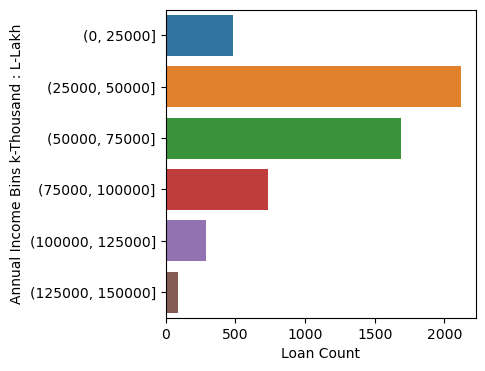

In [87]:
plt.figure(figsize=(4,4))
ai = sns.countplot(y='annualIncomeBins',data = loanChargedOffDf)
ai.set(xlabel='Loan Count',ylabel='Annual Income Bins k-Thousand : L-Lakh')
plt.show()

#### Observation 6 - People who are earning between 25k-50k are the top defaulters followed by 50k-75k

In [88]:
loanChargedOffDf['verification_status'].value_counts()

Not Verified       2089
Verified           1943
Source Verified    1370
Name: verification_status, dtype: int64

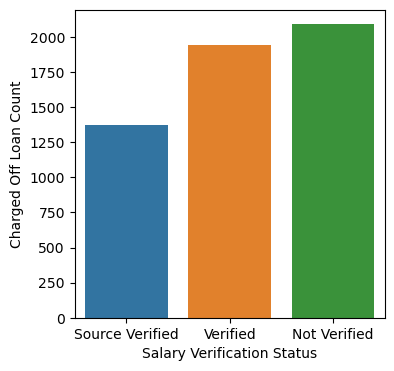

In [89]:
plt.figure(figsize=(4,4))
vs = sns.countplot(x='verification_status',data = loanChargedOffDf)
vs.set(xlabel='Salary Verification Status',ylabel='Charged Off Loan Count')
plt.show()

#### Not much difference in Verification Status

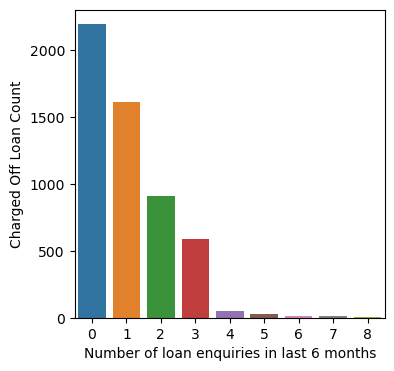

In [90]:
plt.figure(figsize=(4,4))
inq = sns.countplot(x='inq_last_6mths',data = loanChargedOffDf)
inq.set(xlabel='Number of loan enquiries in last 6 months',ylabel='Charged Off Loan Count')
plt.show()

#### Observation 7 - The people with less number of enquiries are the ones with highest percentage chances for default. This is one of the most important metric . This could happen if Club is giving away risky loans to meet some target and the club employees who are tasked with verifying the applicants data are simply tagging them as verified on the first few requests

In [91]:
loanChargedOffDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5402 entries, 1 to 39678
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             5402 non-null   int64   
 1   funded_amnt_inv       5402 non-null   float64 
 2   term                  5402 non-null   int32   
 3   int_rate              5402 non-null   float64 
 4   installment           5402 non-null   float64 
 5   grade                 5402 non-null   object  
 6   sub_grade             5402 non-null   object  
 7   emp_length            5402 non-null   int32   
 8   home_ownership        5402 non-null   object  
 9   annual_inc            5402 non-null   float64 
 10  verification_status   5402 non-null   object  
 11  issue_d               5402 non-null   object  
 12  loan_status           5402 non-null   object  
 13  purpose               5402 non-null   object  
 14  dti                   5402 non-null   float64 
 15  ear

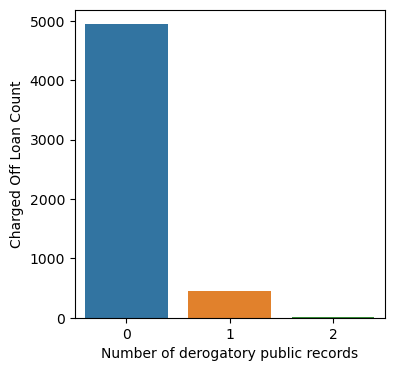

In [92]:
plt.figure(figsize=(4,4))
pr = sns.countplot(x='pub_rec',data = loanChargedOffDf)
pr.set(xlabel='Number of derogatory public records',ylabel='Charged Off Loan Count')
plt.show()

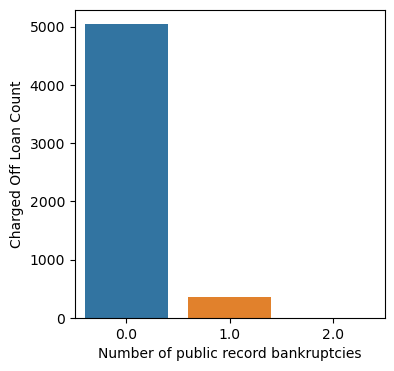

In [93]:
plt.figure(figsize=(4,4))
prb = sns.countplot(x='pub_rec_bankruptcies',data = loanChargedOffDf)
prb.set(xlabel='Number of public record bankruptcies',ylabel='Charged Off Loan Count')
plt.show()

In [94]:
loanChargedOffDf.loan_amnt.describe()

count     5402.000000
mean     11831.307849
std       7885.005738
min        900.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [95]:
loanAmntBins = pd.IntervalIndex.from_tuples([(0, 5000), (5000, 10000), (10000, 15000), (15000, 20000), (20000, 25000), (25000, 30000), (30000, 35000)])
loanChargedOffDf['loanAmntBins'] = pd.cut(loanChargedOffDf['loan_amnt'], loanAmntBins,precision =0,labels=['0k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [96]:
loanChargedOffDf.loanAmntBins.value_counts()

(5000, 10000]     1601
(0, 5000]         1290
(10000, 15000]    1027
(15000, 20000]     722
(20000, 25000]     485
(30000, 35000]     154
(25000, 30000]     123
Name: loanAmntBins, dtype: int64

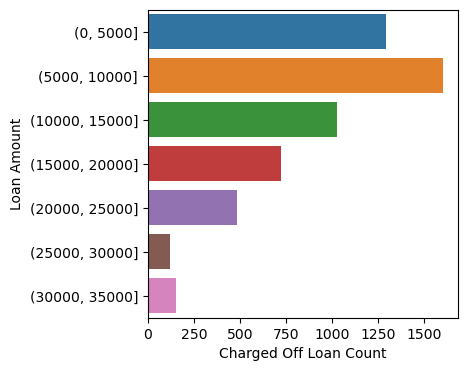

In [97]:
plt.figure(figsize=(4,4))
lab = sns.countplot(y='loanAmntBins',data = loanChargedOffDf)
lab.set(ylabel='Loan Amount',xlabel='Charged Off Loan Count')
plt.show()

#### Observation 8 - The Loan range of 5k-10k as the most defaulted onces

In [98]:
loanChargedOffDf_month_year = loanChargedOffDf['issue_d'].str.partition("-", True)     
loanChargedOffDf['loanIssueMonth']=loanChargedOffDf_month_year[0]                       
loanChargedOffDf['loanIssueYear']='20' + loanChargedOffDf_month_year[2]

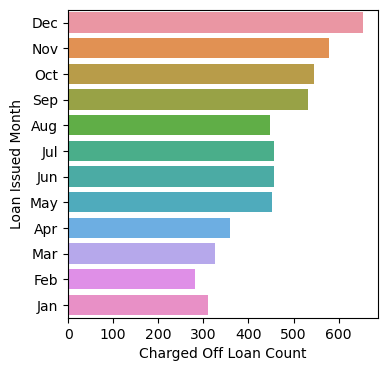

In [99]:
plt.figure(figsize=(4,4))
lim = sns.countplot(y='loanIssueMonth',data = loanChargedOffDf)
lim.set(ylabel='Loan Issued Month',xlabel='Charged Off Loan Count')
plt.show()

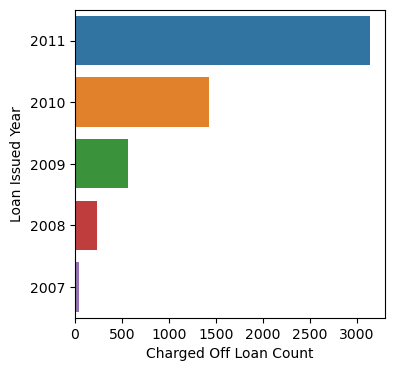

In [100]:
plt.figure(figsize=(4,4))
lim = sns.countplot(y='loanIssueYear',data = loanChargedOffDf)
lim.set(ylabel='Loan Issued Year',xlabel='Charged Off Loan Count')
plt.show()

#### Observation 9 - Dec month and 2011 year where the maximum number of defaults have been made. We need to corelate this info with job layoff and economic downturn data to get more insights 

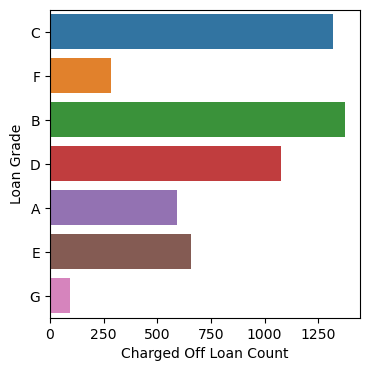

In [101]:
plt.figure(figsize=(4,4))
lim = sns.countplot(y='grade',data = loanChargedOffDf)
lim.set(ylabel='Loan Grade',xlabel='Charged Off Loan Count')
plt.show()

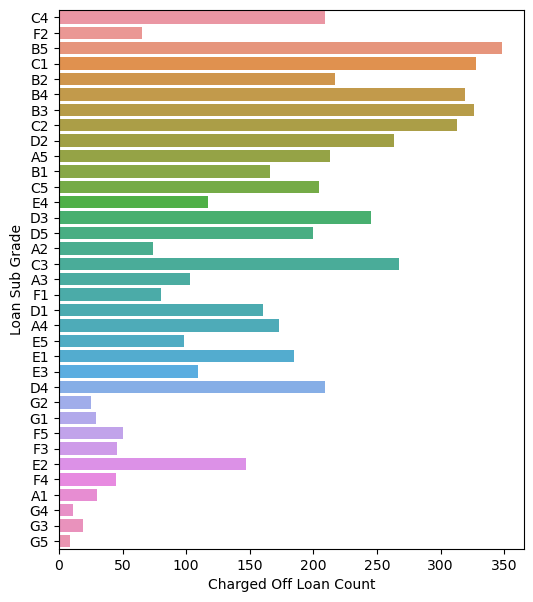

In [102]:
plt.figure(figsize=(6,7))
lim = sns.countplot(y='sub_grade',data = loanChargedOffDf)
lim.set(ylabel='Loan Sub Grade',xlabel='Charged Off Loan Count')
plt.show()

#### Observation 10 - B grade and B5 Sub grade loans have the hightest number of defaults

### Observations From Univariate Analysis


#### 1 - The Lesser The Term The Greater than chance for default
#### 2 - Interest rate of 10% and above is when the default rates increase
#### 3 - Employees whos experience is 10 years are the one's with greater chance of default.
#### 4 - People who are staying in a rental home has the highest chance to default
#### 5 - People who are trying to rechange or restructure the already existing loan are the number one defaulters
#### 6 - People who are earning between 25k-50k are the top defaulters followed by 50k-75k
#### 7 - The people with less number of enquiries are the ones with highest percentage chances for default. This is one of the most important metric . This could happen if Club is giving away risky loans to meet some target and the club employees who are tasked with verifying the applicants data are simply tagging them as verified on the first few requests
#### 8 - The Loan range of 5k-10k as the most defaulted onces
#### 9 - Dec month and 2011 year where the maximum number of defaults have been made. We need to corelate this info with job layoff and economic downturn data to get more insights
#### 10 - B grade and B5 Sub grade loans have the hightest number of defaults

### 3.2 Biivariate Analysis

#### Loan amount vs Interest Rate

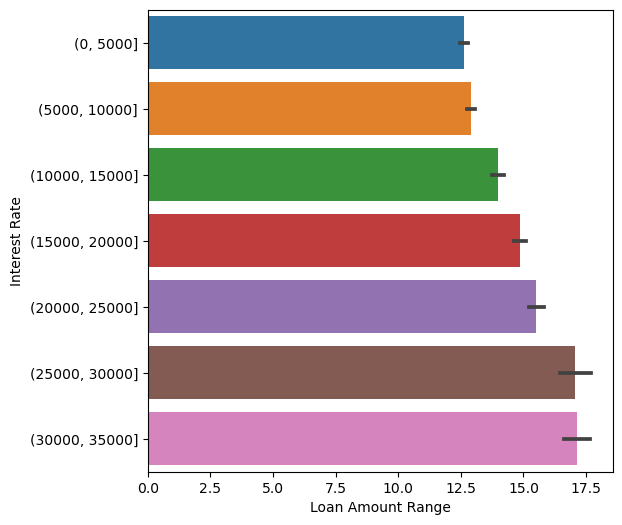

In [108]:
plt.figure(figsize=(6,6))
laIr = sns.barplot(data =loanChargedOffDf,y='loanAmntBins', x='int_rate')
laIr.set(xlabel = 'Loan Amount Range',ylabel='Interest Rate')
plt.show()

#### Observation 11 - Higher Loan Amount rate means Higher Interest Rate

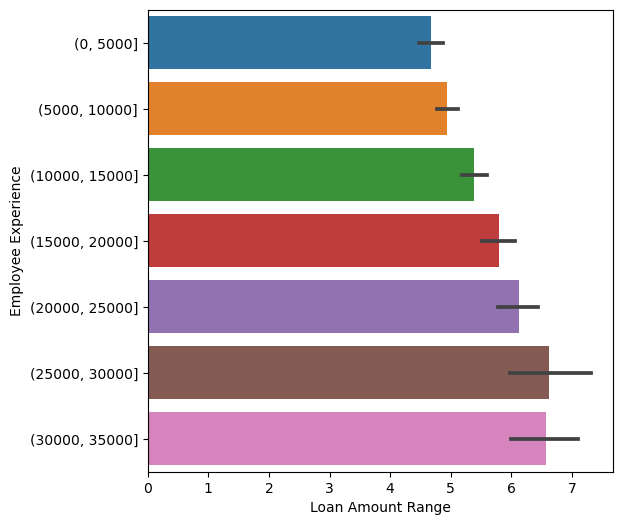

In [111]:
plt.figure(figsize=(6,6))
laEe = sns.barplot(data =loanChargedOffDf,y='loanAmntBins', x='emp_length')
laEe.set(xlabel = 'Loan Amount Range',ylabel='Employee Experience')
plt.show()

#### Observation 12 - Higher Loan Amount was given to employees wih higher experience 

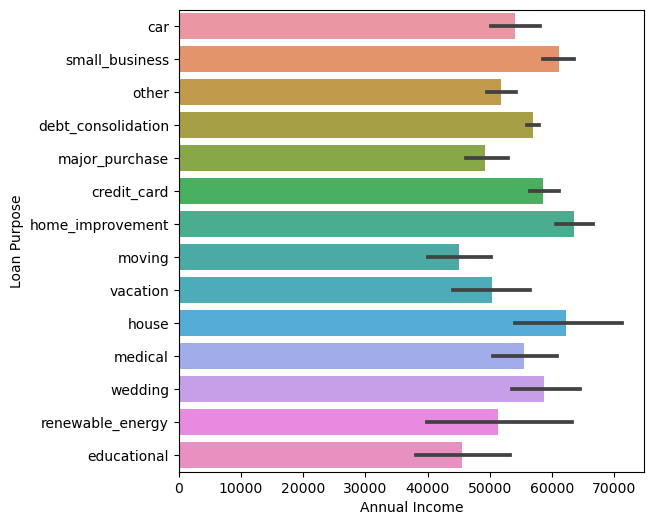

In [118]:
plt.figure(figsize=(6,6))
aiP = sns.barplot(data =loanChargedOffDf,x='annual_inc', y='purpose')
aiP.set(ylabel = 'Loan Purpose',xlabel='Annual Income')
plt.show()

### Observations From Bivariate Analysis

#### 11 - Higher Loan Amount rate means Higher Interest Rate
#### 12 - Higher Loan Amount was given to employees wih higher experience